In [1]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("/content/drive/My Drive/us.csv")
data.cases

0            1
1            1
2            1
3            2
4            3
        ...   
157    2483568
158    2525928
159    2565015
160    2604915
161    2653280
Name: cases, Length: 162, dtype: int64

In [3]:
confirmed = data.cases

In [4]:
x = np.arange(len(confirmed))
x = add_constant(x)

In [5]:
#Logistics starting
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
logistic_function = lambda x, a, b, c, d: \
    a / (1 + np.exp(-c * (x - d))) + b
#above Logistic formula

In [6]:
confirmed = np.array(confirmed)
x = x[:, 1]

In [7]:
(a_, b_, c_, d_), _ = curve_fit(logistic_function, x, confirmed)
#the calculation of the a, b, c, and d is based on the data. 
#The more data we put in, 
#the more accurate these coefficients/constants can make the model.

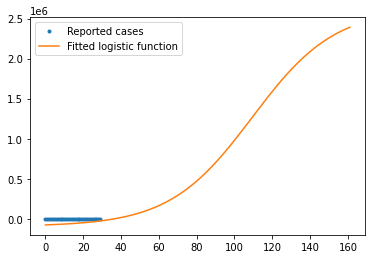

In [8]:
def plot_logistic_fit(confirmed, logistic_params):
    a_, b_, c_, d_ = logistic_params
    x = np.arange(0, len(confirmed))
    plt.plot(x[:30], confirmed[:30], ".", label="Reported cases")
    confirmed_pred = logistic_function(x, a_, b_, c_, d_)
    plt.plot(x, confirmed_pred, label="Fitted logistic function")
    plt.legend()
    plt.show()
    return confirmed_pred
confirmed_pred = plot_logistic_fit(confirmed, (a_, b_, c_, d_))

In [9]:
r2_score(confirmed, confirmed_pred)

0.9911317366080079

In [10]:
logistic_function(x, a_, b_, c_, d_)
#Yes, the negative numbers are part of the function-logistic functions can go below zero
#But will definitely change if we change the amount of data input

array([-7.61544787e+04, -7.53012376e+04, -7.44087488e+04, -7.34752348e+04,
       -7.24988405e+04, -7.14776294e+04, -7.04095812e+04, -6.92925877e+04,
       -6.81244497e+04, -6.69028731e+04, -6.56254658e+04, -6.42897333e+04,
       -6.28930750e+04, -6.14327804e+04, -5.99060248e+04, -5.83098652e+04,
       -5.66412358e+04, -5.48969441e+04, -5.30736657e+04, -5.11679406e+04,
       -4.91761678e+04, -4.70946012e+04, -4.49193445e+04, -4.26463467e+04,
       -4.02713969e+04, -3.77901198e+04, -3.51979710e+04, -3.24902317e+04,
       -2.96620043e+04, -2.67082074e+04, -2.36235717e+04, -2.04026347e+04,
       -1.70397370e+04, -1.35290178e+04, -9.86441086e+03, -6.03964073e+03,
       -2.04821948e+03,  2.11655660e+03,  6.46160972e+03,  1.09940828e+04,
        1.57213415e+04,  2.06509752e+04,  2.57907979e+04,  3.11488478e+04,
        3.67333870e+04,  4.25528992e+04,  4.86160879e+04,  5.49318718e+04,
        6.15093809e+04,  6.83579503e+04,  7.54871129e+04,  8.29065907e+04,
        9.06262852e+04,  